### CS4423 - Networks
Angela Carnevale  
School of Mathematical and Statistical Sciences  
University of Galway

# Assignment 2

Provide answers to the problems in the boxes provided.  

The buttons at the top of the page can be used to **create
more boxes if needed**.
The type of box can be changed from `Code` to `Markdown`.
`Code` boxes take (and execute) `python` code.
`Markdown` boxes take (and format nicely) **text input**.
In this way, you can provide answers, ask questions, 
or raise issues, in words.

When finished, please **print** this notebook into a **PDF** file and submit this to
**Canvas**. Please note that you don't need to "convert" to PDF, it's enough to Print to PDF (and it should be much easier to do).

**Deadline.** Tuesday 27 February at 5pm. 

## Setup

This is a `jupyter` notebook.   You can open and interact
with the notebook through one of sites recommended on the webpage of the module.

Or, you can
install and use `jupyter` as a `python` package on your own laptop or PC.  

The following command loads the `networkx` package into the current session.  
The next command specifies some standard options that can be useful for drawing graphs.  

In order to execute the code in a box,
use the mouse or arrow keys to highlight the box and then press SHIFT-RETURN.

In [397]:
import networkx as nx
import pandas as pd ## can be used to visualise data arising from computing centrality measures
opts = { "with_labels": True, "node_color": 'y' }

Should it ever happen that the notebook becomes unusable, start again with a fresh copy.

## 1. Breadth First Search.

Breadth First Search (BFS) is a versatile and efficient strategy for systematically visiting
all the nodes in a graph.

Given a graph $G = (X, E)$ and a starting point $x \in X$, BFS can be described as the following sequence of steps.

1. mark all nodes of $G$ as "unseen".

2. initialize a list `seen = [x]` and mark `x` as seen.

3. loop over the elements `y` in the list `seen` and, in each step, visit the
   node `y` and add all of `y`'s neighbors that have not been marked as "seen"
   to the list `seen` and mark them as seen.


### For Example

Consider the graph on the vertex set `"ABCDEFHIJK"`
defined in the nearby file `data/bfs_hw.adj` by adjacency lists. 

**Note.** If you are working locally on your machine you might need to change the path to the file (e.g., remove "data/" if the file is in the same folder as this notebook).

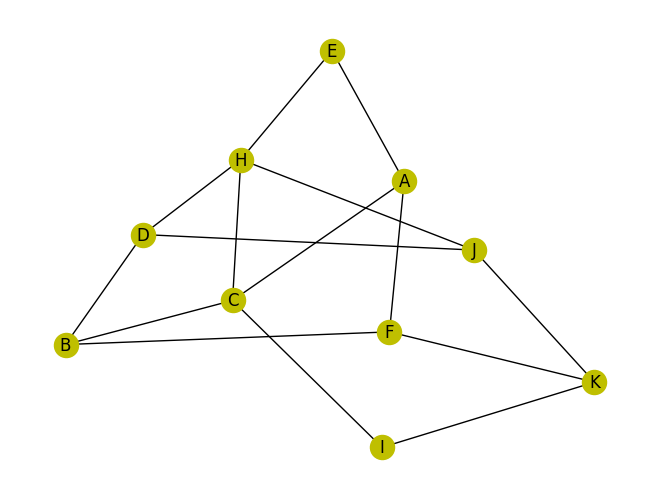

In [398]:
G = nx.read_adjlist("data/bfs_hw.adj")
nx.draw(G, **opts)

Let's say we want to start exploring the graph at vertex `'A'`

In [399]:
x = 'A'

**Step 1.** For each of its nodes `x`, the graph object `G` maintains in `G.nodes[x]` a `python` dictionary
that can be used store arbitrary attributes of the nodes.  We can use it for an attribute `'seen'`,
which is set to `True` or `False`, depending on whether the node has already been seen by this instance 
of BFS, or not.  Initially it would be set to `False` for all nodes.

In [400]:
G.nodes[x]

{}

In [401]:
for y in G:
    G.nodes[y]['seen'] = False

**Step 2.** Initialize a `python` list `seen` to contain `x` only, and set `x`'s `'seen'` attribute to `True`.

In [402]:
seen = [x]
G.nodes[x]['seen'] = True

**Step 3.**  The loop over `seen`.  For each node `y` in the list, print `y`, then
add all of `y`'s unseen neighbors to the end of the list `seen` and mark them
as `"seen"`.  Note how the list `seen` initially has only one element, but grows
over time, until no more new nodes are detected.  
The loop automatically terminates when the end of the list `seen` has been reached.

In [403]:
for y in seen:
    print(y)
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            seen.append(z)
            G.nodes[z]['seen'] = True

A
C
E
F
B
I
H
K
D
J


In a variant of the same BFS strategy, on can construct a tree on the vertex set $X$ that
records the history of how the nodes in the graph $G$ were discovered.

In [404]:
x = 'A'

We set up an empty graph `T` to eventually contain the tree.

In [405]:
T = nx.Graph()

From here it's essentially the same procedure as above ...

In [406]:
for y in G:
    G.nodes[y]['seen'] = False

... except that we need to add the initial vertex `x` to `T` ...

In [407]:
T.add_node(x)
seen = [x]
G.nodes[x]['seen'] = True

... and instead of printing `y`, we add the edges leading to `y`'s children to the tree `T`.

In [408]:
for y in seen:
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            T.add_edge(y, z)
            seen.append(z)
            G.nodes[z]['seen'] = True

The resulting tree `T` is called a **spanning tree** of the graph `G`.

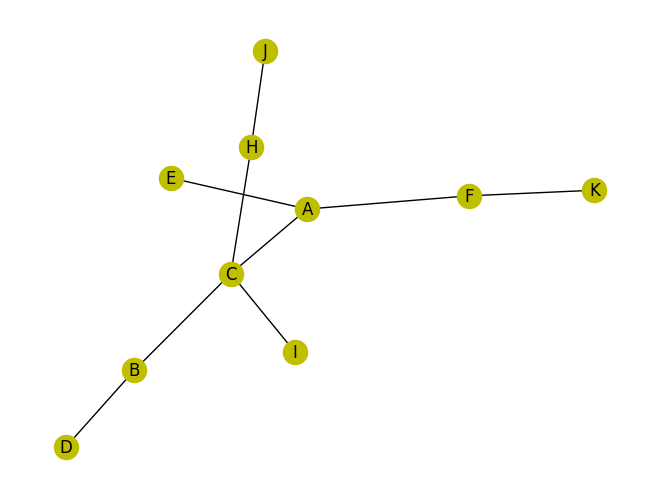

In [409]:
nx.draw(T, **opts)

## Tasks (10+10+20 marks)

1. Print out all the nodes of $G$ as discovered when the starting point is node `H`.
2. Construct a spanning tree $T2$ of the graph $G$ with node `H` as starting point.
3. Draw $T2$. Using code or otherwise, now visit $T2$ by BFS and DFS and determine the order in which the nodes will be visited if `A` is taken as the starting node.

In [410]:
# G has already been defined

# Print nodes of G when starting point is H

# Set x as 'H'
x = 'H'

G.nodes[x]

# set empty tree to hold the spanning tree
T2 = nx.Graph()


In [411]:

for y in G:
    G.nodes[y]['seen'] = False


In [412]:
# initialise a list 'seen' to contain x, and set x's 'seen' to true
# add x to T2

T2.add_node(x)

seen = [x]
G.nodes[x]['seen'] = True

In [413]:
# Loop over seen
# For each node, print the node, then add its unseen neighbours to the end of 'seen' and mark them as 'seen'.
for y in seen:
    print(y)
    for z in G.neighbors(y):
        if not G.nodes[z]['seen']:
            T2.add_edge(y, z)
            seen.append(z)
            G.nodes[z]['seen'] = True


H
C
D
E
J
A
B
I
K
F


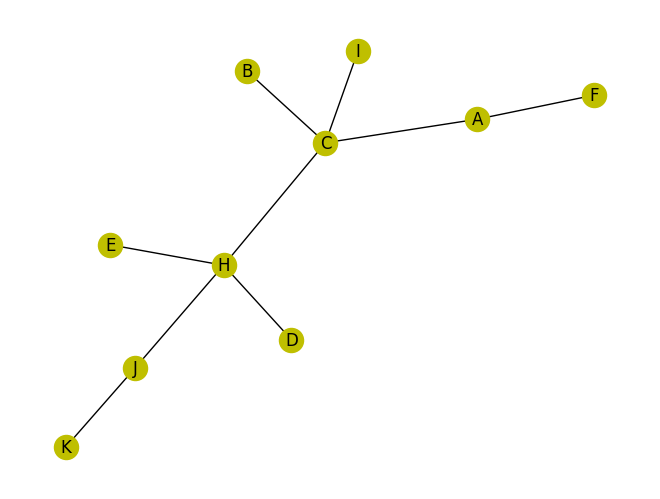

In [414]:
nx.draw(T2, **opts)

In [415]:
# Breadth first search on T2
# Start at node A

x = 'A'

T2.nodes[x]

for y in T2:
    T2.nodes[y]['seen'] = False

seen = [x]
T2.nodes[x]['seen'] = True

print("Order in which nodes of T2 are visited in a breadth first search starting at A")

for y in seen:
    print(y)
    for z in T2.neighbors(y):
        if not T2.nodes[z]['seen']:
            seen.append(z)
            T2.nodes[z]['seen'] = True


Order in which nodes of T2 are visited in a breadth first search starting at A
A
C
F
H
B
I
D
E
J
K


In [416]:
# Depth first search on T2

x = 'A'

T2.nodes[x]

for y in T2:
    T2.nodes[y]['seen'] = False

seen = [x]
T2.nodes[x]['seen'] = True

print("Order in which nodes of T2 are visited in a depth first search starting at A")

def dfs(T2, x):
    print(x, end=', ')
    T2.nodes[x]['seen'] = True
    for y in T2[x]:
        if not T2.nodes[y]['seen']:
            dfs(T2, y)

dfs(T2, x)


Order in which nodes of T2 are visited in a depth first search starting at A
A, C, H, D, E, J, K, B, I, F, 

The breadth first search algorithm starts at a chosen node in the graph, marks that node as visited. Then it moves onto that node's neighbours, marks them as seen and moves onto the next level. This algorithm explores the nearest vertices first. 
Depth first search starts from the chosen starting node marks it as visited, and then visits all of the nodes on that 'branch' i.e, explores the graph deeply rather than trying to spread out layer by layer. After it reaches the end of a path, it goes back to explore another path and mark those as visited.

## 2.  The Counties of Ireland.

Define a graph `I` on the $32$ counties of the island of Ireland by
joining two counties whenever they have a common border.

A list of counties and their borders in the adjacency list format
can be found in the nearby file `data/ireland.adj`. 

Remember, you can construct the graph `I` directly from the adjacency list.

## Tasks (10+20 marks)

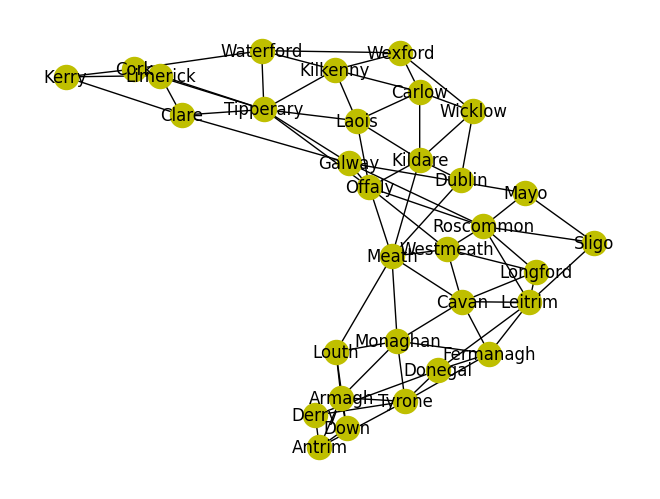

In [417]:
I = nx.read_adjlist("data/ireland.adj")

nx.draw(I, **opts)

* What are the order and the size of the resulting graph?

In [418]:
# Order of I

print("Order of I: ", I.order())

# Size of I

print("Size of I: ", I.size())

Order of I:  32
Size of I:  76


... your comments here...

* In terms of centrality measures, what are the $3$ most central counties, for

    1.  degree centrality?
    1.  eigenvector centrality?
    1.  closeness centrality?
    1.  betweenness centrality?

Please use as many code and as many text cells as needed and make sure to respond to each point.

In [419]:
nx.set_node_attributes(I, dict(I.degree()), 'degree')
print(dict(I.degree()))

pd.DataFrame.from_dict(
    dict(I.nodes(data=True)), 
    orient='index'
).sort_values('degree', ascending=False)

{'Antrim': 4, 'Armagh': 5, 'Derry': 3, 'Down': 3, 'Tyrone': 6, 'Monaghan': 6, 'Louth': 4, 'Carlow': 5, 'Kildare': 6, 'Kilkenny': 5, 'Laois': 5, 'Wexford': 4, 'Wicklow': 4, 'Cavan': 6, 'Fermanagh': 5, 'Leitrim': 6, 'Longford': 4, 'Meath': 7, 'Westmeath': 5, 'Clare': 4, 'Galway': 5, 'Kerry': 3, 'Limerick': 4, 'Tipperary': 8, 'Cork': 4, 'Waterford': 4, 'Donegal': 4, 'Dublin': 3, 'Mayo': 3, 'Offaly': 7, 'Roscommon': 7, 'Sligo': 3}


,degree
Tipperary,8
Roscommon,7
Offaly,7
Meath,7
Tyrone,6
Cavan,6
Kildare,6
Monaghan,6
Leitrim,6
Westmeath,5


In [420]:
# Get degree centrality

degree_cent = nx.degree_centrality(I)
nx.set_node_attributes(I, degree_cent, 'Degree Centrality')

pd.DataFrame.from_dict(
    dict(I.nodes(data=True)), 
    orient='index'
).sort_values('Degree Centrality', ascending=False)


,degree,Degree Centrality
Tipperary,8,0.258065
Roscommon,7,0.225806
Offaly,7,0.225806
Meath,7,0.225806
Cavan,6,0.193548
Tyrone,6,0.193548
Monaghan,6,0.193548
Kildare,6,0.193548
Leitrim,6,0.193548
Laois,5,0.161290


As you can see from the sorted data, the top 3 counties for degree centrality are Tipperary, Roscommon, and Offaly

In [421]:
eigen_cen = nx.eigenvector_centrality(I)
nx.set_node_attributes(I, eigen_cen, 'Eigenvector Centrality')

pd.DataFrame.from_dict(
    dict(I.nodes(data=True)), 
    orient='index'
).sort_values('Eigenvector Centrality', ascending=False)

,degree,Degree Centrality,Eigenvector Centrality
Offaly,7,0.225806,0.327506
Meath,7,0.225806,0.289622
Roscommon,7,0.225806,0.266327
Tipperary,8,0.258065,0.258747
Cavan,6,0.193548,0.250965
Westmeath,5,0.161290,0.250843
Kildare,6,0.193548,0.234722
Laois,5,0.161290,0.217561
Monaghan,6,0.193548,0.209616
Leitrim,6,0.193548,0.209394


For eigenvector centrality, the 3 most central counties are Offaly, Meath and Roscommon

In [422]:
# closeness centrality

closeness = nx.closeness_centrality(I)


nx.set_node_attributes(I, closeness, 'Closeness Centrality')

pd.DataFrame.from_dict(
    dict(I.nodes(data=True)), 
    orient='index'
).sort_values('Closeness Centrality', ascending=False)


,degree,Degree Centrality,Eigenvector Centrality,Closeness Centrality
Offaly,7,0.225806,0.327506,0.469697
Meath,7,0.225806,0.289622,0.455882
Roscommon,7,0.225806,0.266327,0.413333
Kildare,6,0.193548,0.234722,0.407895
Westmeath,5,0.161290,0.250843,0.407895
Galway,5,0.161290,0.205811,0.402597
Tipperary,8,0.258065,0.258747,0.397436
Monaghan,6,0.193548,0.209616,0.387500
Cavan,6,0.193548,0.250965,0.387500
Laois,5,0.161290,0.217561,0.382716


The top three counties for Closeness centrality are Offaly, Meath and Roscomon

In [423]:
# betweenness centrality

betweenness = nx.betweenness_centrality(I)

print('Betweenness: ', betweenness)


Betweenness:  {'Antrim': 0.008530465949820789, 'Armagh': 0.03006947966200937, 'Derry': 0.006028095654581223, 'Down': 0.01006034146950955, 'Tyrone': 0.06550277616491539, 'Monaghan': 0.13282497088524253, 'Louth': 0.08271028867378612, 'Carlow': 0.025320844030521438, 'Kildare': 0.11635411183798279, 'Kilkenny': 0.021486834551350677, 'Laois': 0.0439479934641225, 'Wexford': 0.015783410138248848, 'Wicklow': 0.026697621375040732, 'Cavan': 0.06148348664477698, 'Fermanagh': 0.0332579983683549, 'Leitrim': 0.12019781262565642, 'Longford': 0.004695844776489938, 'Meath': 0.30880546008729365, 'Westmeath': 0.03762728012728012, 'Clare': 0.04206569698929632, 'Galway': 0.11361370535394305, 'Kerry': 0.0007168458781362007, 'Limerick': 0.00923596870965292, 'Tipperary': 0.22268141529601634, 'Cork': 0.018324550378879752, 'Waterford': 0.022268460332976463, 'Donegal': 0.04608844937367856, 'Dublin': 0.02210709242967307, 'Mayo': 0.007204301075268817, 'Offaly': 0.2793299833537525, 'Roscommon': 0.16234997945524263, 

In [424]:
nx.set_node_attributes(I, betweenness, 'Betweenness Centrality')

pd.DataFrame.from_dict(
    dict(I.nodes(data=True)), 
    orient='index'
).sort_values('Betweenness Centrality', ascending=False)

,degree,Degree Centrality,Eigenvector Centrality,Closeness Centrality,Betweenness Centrality
Meath,7,0.225806,0.289622,0.455882,0.308805
Offaly,7,0.225806,0.327506,0.469697,0.279330
Tipperary,8,0.258065,0.258747,0.397436,0.222681
Roscommon,7,0.225806,0.266327,0.413333,0.162350
Monaghan,6,0.193548,0.209616,0.387500,0.132825
Leitrim,6,0.193548,0.209394,0.373494,0.120198
Kildare,6,0.193548,0.234722,0.407895,0.116354
Galway,5,0.161290,0.205811,0.402597,0.113614
Louth,4,0.129032,0.128441,0.356322,0.082710
Tyrone,6,0.193548,0.142125,0.319588,0.065503


Finally, the top three counties for Betweenness Centrality are Meath, Offaly and Tipperary

## 3. Constructing examples.

## Tasks (10+10+10 marks)

1. Give an example of a graph on 8 vertices all of which have degree centrality equal to 4. For such graph,  also compute the normalised eigenvector, closeness and betweenness centralities. What do you observe? 

1. Determine the normalised degree centrality of the nodes in some
   random trees.  Is there some function of the degree centrality that is constant across your examples? Why?
   
1. Give an example of a graph on $n=6,7,8$ vertices which has a _unique_ node that is highest ranked with respect to normalised degree, closeness and betweenness centrality. Can you think of such an example for any $n$? 


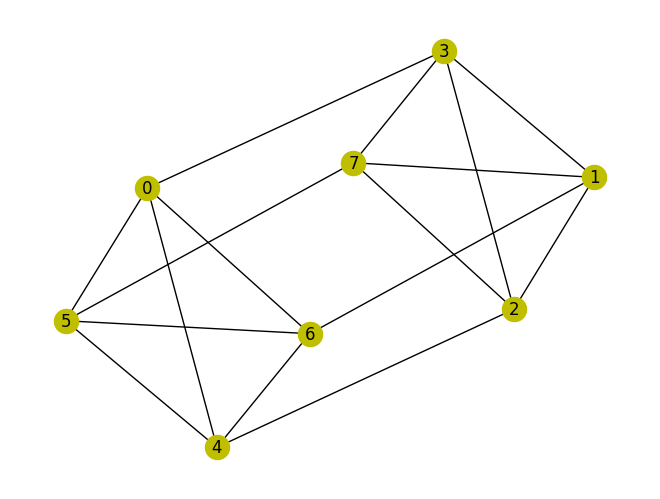

In [492]:
list_of_degrees = [4, 4, 4, 4, 4, 4, 4, 4]


G = nx.random_degree_sequence_graph(list_of_degrees)

nx.draw(G, **opts)

This graph is a fully connected graph. The graph is also symmetric - this is because of each node having the same degree centrality. Each vertex is also connected to 4 other vertices. This in turn means that the graph is not a bipartite graph.

In [481]:
# calculating the centralities for question 1

# degree centrality
degree_cent = nx.degree_centrality(G)

# eigenvector centrality
eigen_cent = nx.eigenvector_centrality(G)

# closeness centrality
closeness_cent = nx.closeness_centrality(G)

# betweenness centrality
betweenness_cent = nx.betweenness_centrality(G)

In [434]:

df = pd.DataFrame([degree_cent, eigen_cent, closeness_cent, betweenness_cent]).T

df.columns = ['Degree Centrality', 'Eigenvector Centrality', 'Closeness Centrality', 'Betweenness Centrality']

print(df)

   Degree Centrality  Eigenvector Centrality  Closeness Centrality  \
0           0.571429                0.353553                   0.7   
1           0.571429                0.353553                   0.7   
2           0.571429                0.353553                   0.7   
3           0.571429                0.353553                   0.7   
4           0.571429                0.353553                   0.7   
5           0.571429                0.353553                   0.7   
6           0.571429                0.353553                   0.7   
7           0.571429                0.353553                   0.7   

   Betweenness Centrality  
0                0.075397  
1                0.075397  
2                0.067460  
3                0.067460  
4                0.067460  
5                0.075397  
6                0.067460  
7                0.075397  


Question 3.2

In [502]:
T10 = nx.random_tree(10)

T15 = nx.random_tree(15)

T12 = nx.random_tree(12)

# Calculate degree centrality
degree_centrality1 = nx.degree_centrality(T10)
degree_centrality2 = nx.degree_centrality(T15)
degree_centrality3 = nx.degree_centrality(T12)

print(degree_centrality1)
print(degree_centrality2)
print(degree_centrality3)


{0: 0.1111111111111111, 1: 0.1111111111111111, 2: 0.1111111111111111, 3: 0.2222222222222222, 4: 0.2222222222222222, 5: 0.3333333333333333, 6: 0.1111111111111111, 7: 0.3333333333333333, 8: 0.2222222222222222, 9: 0.2222222222222222}
{0: 0.07142857142857142, 1: 0.21428571428571427, 2: 0.14285714285714285, 3: 0.07142857142857142, 4: 0.07142857142857142, 5: 0.2857142857142857, 6: 0.14285714285714285, 7: 0.14285714285714285, 8: 0.07142857142857142, 9: 0.07142857142857142, 10: 0.14285714285714285, 11: 0.07142857142857142, 12: 0.21428571428571427, 13: 0.14285714285714285, 14: 0.14285714285714285}
{0: 0.2727272727272727, 1: 0.2727272727272727, 2: 0.09090909090909091, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.18181818181818182, 6: 0.09090909090909091, 7: 0.18181818181818182, 8: 0.18181818181818182, 9: 0.18181818181818182, 10: 0.09090909090909091, 11: 0.18181818181818182}


The function to compute the average degree centrality will be the same across all trees. The function to compute the standard deviation of the degree centrality will also be the same across all trees. 

Question 3.3

In [504]:
n = 6

# star graph with n vertices
G = nx.star_graph(n-1)

# centrality
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

centrality_measures_n6 = {
    "Node": list(range(n)),
    "Degree Centrality": [f"{degree_centrality[node]:.2f}" for node in range(n)],
    "Closeness Centrality": [f"{closeness_centrality[node]:.2f}" for node in range(n)],
    "Betweenness Centrality": [f"{betweenness_centrality[node]:.2f}" for node in range(n)],
}

print(pd.DataFrame(centrality_measures_n6))

   Node Degree Centrality Closeness Centrality Betweenness Centrality
0     0              1.00                 1.00                   1.00
1     1              0.20                 0.56                   0.00
2     2              0.20                 0.56                   0.00
3     3              0.20                 0.56                   0.00
4     4              0.20                 0.56                   0.00
5     5              0.20                 0.56                   0.00


In [505]:
n = 7

# star graph with n vertices
G = nx.star_graph(n-1)

# centrality
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

centrality_measures_n7 = {
    "Node": list(range(n)),
    "Degree Centrality": [f"{degree_centrality[node]:.2f}" for node in range(n)],
    "Closeness Centrality": [f"{closeness_centrality[node]:.2f}" for node in range(n)],
    "Betweenness Centrality": [f"{betweenness_centrality[node]:.2f}" for node in range(n)],
}

print(pd.DataFrame(centrality_measures_n7))

   Node Degree Centrality Closeness Centrality Betweenness Centrality
0     0              1.00                 1.00                   1.00
1     1              0.17                 0.55                   0.00
2     2              0.17                 0.55                   0.00
3     3              0.17                 0.55                   0.00
4     4              0.17                 0.55                   0.00
5     5              0.17                 0.55                   0.00
6     6              0.17                 0.55                   0.00


In [506]:
n = 8

# star graph with n vertices
G = nx.star_graph(n-1)

# centrality
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

centrality_measures_n8 = {
    "Node": list(range(n)),
    "Degree Centrality": [f"{degree_centrality[node]:.2f}" for node in range(n)],
    "Closeness Centrality": [f"{closeness_centrality[node]:.2f}" for node in range(n)],
    "Betweenness Centrality": [f"{betweenness_centrality[node]:.2f}" for node in range(n)],
}

print(pd.DataFrame(centrality_measures_n8))

   Node Degree Centrality Closeness Centrality Betweenness Centrality
0     0              1.00                 1.00                   1.00
1     1              0.14                 0.54                   0.00
2     2              0.14                 0.54                   0.00
3     3              0.14                 0.54                   0.00
4     4              0.14                 0.54                   0.00
5     5              0.14                 0.54                   0.00
6     6              0.14                 0.54                   0.00
7     7              0.14                 0.54                   0.00


A star graph will always have the 'centre' node as the highest centrality across degree, closeness, and betweenness centrality measures. 